# Using clustering algorithm to classify handwritten numbers

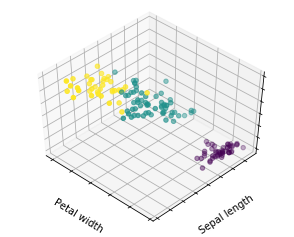

In [31]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
x = iris.data
y = iris.target

model = KMeans(n_clusters=3, n_init=10)
model.fit(x)

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

yhat = model.predict(x)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=yhat.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

In [32]:
# let's take a look inside each cluster
from scipy import stats

for j in range(3):
    indices = np.where(yhat == j)
    m = stats.mode(yhat[indices[0]])
    print("cluster #" + str(j))
    print("cluster size: " + str (len(indices[0])))
    print(m)
    print("\n")

cluster #0
cluster size: 50
ModeResult(mode=array([0], dtype=int32), count=array([50]))


cluster #1
cluster size: 62
ModeResult(mode=array([1], dtype=int32), count=array([62]))


cluster #2
cluster size: 38
ModeResult(mode=array([2], dtype=int32), count=array([38]))




In [36]:
# now we can calculate the accuracy
real_yhat = yhat
for j in range(3):
    indices = np.where(yhat == j)
    m = stats.mode(y[indices[0]])
    y_lab = m[0]
    real_yhat[indices[0]] = y_lab

from sklearn.metrics import accuracy_score
acc = accuracy_score(y, yhat)
print("accuracy: " + str(acc*100) + '%')

accuracy: 89.3333333333%
